# This is Udacity ML basic P4 heading line

### 总体结构以及数据集问题提出

    1.1 Introduction and question list for study.
       -- Titanic disaster data introdction which is downloaded from Kaggle.
       -- Question list
          -- which factor might be the key for survivals?
          -- what is the rank of other factors for survivals?
          -- any conclustion or predition we could make for survivials? and any limitations we have to consider?
          
    1.2 Data Wrangling）：读取数据集，查看常规属性，评估和识别数据质量问题，清理数据
       -- read the data set and check the field
       -- data clean(nan or dup data handle)

    2. 数据分析 (EDA, Exploratory Data Analysis）
       -- single variable impacts on survival
       -- multiple variable correlations on suvival
       -- Visualization for analyzed results.
    探索性数据分析（EDA, Exploratory Data Analysis）：计算统计量，绘制数据可视化，先探索单个变量，再探索变量之间的关系，回应研究问题
    3。Conclusion
       An limitation or prediction?


### 1.1 data set introdcution

Data Dictionary

Variable	Definition	Key

survival 	Survival 	0 = No, 1 = Yes

pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

sex 	Sex 	

Age 	Age in years 	

sibsp 	# of siblings / spouses aboard the Titanic 	

parch 	# of parents / children aboard the Titanic 	

ticket 	Ticket number 	

fare 	Passenger fare 	

cabin 	Cabin number 	

embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.




### 1.2.1 Read csv file and list the first 5 rows.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
G_CHILD_AGE = 18

tt_file = pd.read_csv("titanic_data.csv", index_col = "PassengerId")
print tt_file.head(5)

Populating the interactive namespace from numpy and matplotlib
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1   

### 1.2.2 Data Clean related handlers
    -- N/A data description
    
        -- Age: 177 of 891 is null. and tt_file.Age.mean()=29.7
        
          -- we fill the null age with the mean() value to avoid any discarding.
          
          -- so that the data set kept as whole(891) since the entire data set size is not so large.
          
    -- Data type converstion
    
        -- Sex
        
          -- we add a 'child' in Sex type according to Age value ( check whether the Age is less than 18)
          
          -- this could benifit the care of children besides the view of male and female.
          
        -- Embarked
        
          -- fill the digital mapping as
          
          -- 'C' -> 0
          
          -- 'Q' -> 1
          
          -- 'S' -> 2
          
    -- Data range converstion in corr() handler
    
        -- Age
        
        -- Fare
        
            -- both these field ranges are narrowed into the amount of 10 units
            
            -- we treat them in this way to avoid too many scatters of such numbers.        


In [121]:

def convert_child_age(df):
    """ Add to the Sex field with 'child' type according to the value of Age."""
    if df.Age < G_CHILD_AGE:
        df.Sex =  'child'
    return df
        
def field_digitization():
    """convert into integer from string for corrcoef() calculation."""   
    tt_file.Sex = tt_file.Sex.map({"male":0, "female":1})
    tt_file.Embarked = tt_file.Embarked.map({"C":0, "Q":1, "S":2})
    #df[‘column1’].map(lambda x: 10+x), this will add 10 to each element of column1.
    tt_file.Age = tt_file.Age.map(lambda x: int(round(float(x) / 10, 0)))
    tt_file.Fare = tt_file.Fare.map(lambda x: int(round(float(x) / 10, 0)))


# replace the nan age/Fare with the mean() value rather than discarding them 
# since the dataset size is small.
tt_file.Age.fillna(tt_file.Age.mean(),inplace=True)


### 2.1 Consider the sex & numbers from the survived and non-survived people

Sex     Survived
child   0            52
        1            61
female  0            64
        1           195
male    0           433
        1            86
Name: Survived, dtype: int64


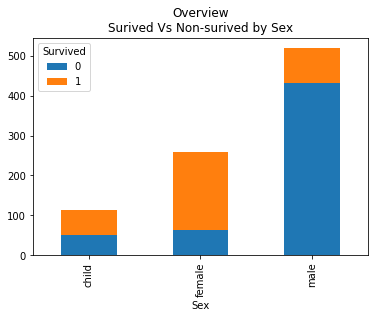

In [122]:
# 2.1 calculate the number of survived and non-survived people with 'male', 'female' and 'child' types.
#print survived_overview
survived_overview = tt_file.apply(convert_child_age, axis=1)

print survived_overview.groupby(['Sex', 'Survived'])['Survived'].count()
survived_overview.groupby(['Sex', 'Survived'])['Survived'].count().unstack().plot(kind ='bar', \
                            stacked=True, title='Overview\nSurived Vs Non-surived by Sex')



1) The ration  of non-survived male people (49%) which implies:   


Survived  Sex   
0         child      52
          female     64
          male      433
1         child      61
          female    195
          male       86
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x7f94599110d0>,
 [Text(0.0513046,1.0988,u'non_survived_male'),
  Text(-1.0915,-0.136508,u'non_survived_female'),
  Text(-0.949764,-0.554931,u'non_survived_child'),
  Text(-0.569635,-0.941019,u'survived_male'),
  Text(0.479472,-0.990003,u'survived_female'),
  Text(1.07403,-0.23762,u'survived_child')],
 [Text(0.0279843,0.599347,u'48.51'),
  Text(-0.595362,-0.074459,u'6.93'),
  Text(-0.518053,-0.30269,u'5.94'),
  Text(-0.31071,-0.513283,u'9.90'),
  Text(0.26153,-0.540002,u'21.78'),
  Text(0.585834,-0.129611,u'6.93')])

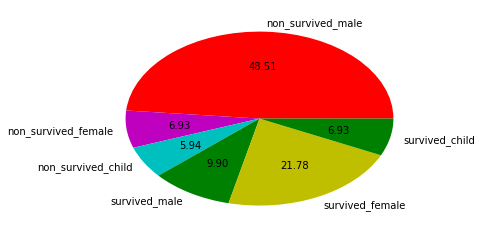

In [123]:
# 2.2 calculate the ration for different types with the computed people number above.
ratio_overview = survived_overview.groupby(['Survived',"Sex"])['Sex'].count()
print ratio_overview

# non_survived_C - C for child number
# non_survived_F - F for female number
# non_survived_M - M for male number
non_survived_child = ratio_overview.iloc[0]
non_survived_female = ratio_overview.iloc[1]
non_survived_male = ratio_overview.iloc[2]
survived_child = ratio_overview.iloc[3]
survived_female = ratio_overview.iloc[4]
survived_male = ratio_overview.iloc[5]

# total survived and non-survived number
# total_survived - survived number
# total_non_survived - non-survived number
total_survived = survived_female + survived_male + survived_child
total_non_survived = non_survived_female + non_survived_male + non_survived_child
total_ratio = [round(float(non_survived_male) / (total_survived + total_non_survived), 2), 
              round(float(non_survived_female) / (total_survived + total_non_survived), 2),
              round(float(non_survived_child) / (total_survived + total_non_survived), 2),
              round(float(survived_male) / (total_survived + total_non_survived), 2),
              round(float(survived_female) / (total_survived + total_non_survived), 2),
              round(float(survived_child) / (total_survived + total_non_survived), 2)]
#print "overall male ration", (float(survived_male) + non_survived_male ) / (total_survived + total_non_survived)
#print "overall female ration", (float(survived_female) + non_survived_female ) / (total_survived + total_non_survived)
total_label = ['non_survived_male', 'non_survived_female','non_survived_child', \
              'survived_male', 'survived_female', 'survived_child']
male_ratio_pd = pd.Series(total_ratio, index=total_label)
plt.pie(x=male_ratio, labels=male_label, colors=['r', 'm', 'c', 'g','y','g'], autopct='%.2f')

### 2.1 Conclusions from the overview of survived people by sex:

) The ration  of non-survived male people (about 49%) which implies: 

    -- compare with non-survived female ratio (6.93%) plus non-survied child(5.94)
    
      -- means most of the male did not survived.
      
2) The ration of surived female (21.78%) is the second large number with below 2 cases:

    -- compare with non-survived female ratio (6.93%)
    
      -- means most of the female survived.
      
3) The ration of surived and non-survived child are almost equivalent.(6.93% Vs 5.94%) 

### 2.2 Consider the age impact from the survived and non-survived people

Age_group
(70, 80]    0.200000
(60, 70]    0.235294
(20, 30]    0.334152
(10, 20]    0.382609
(40, 50]    0.383721
(50, 60]    0.404762
(30, 40]    0.445161
(0, 10]     0.593750
Name: Survived, dtype: float64


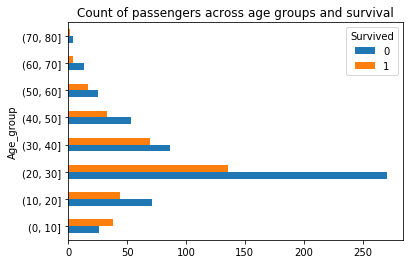

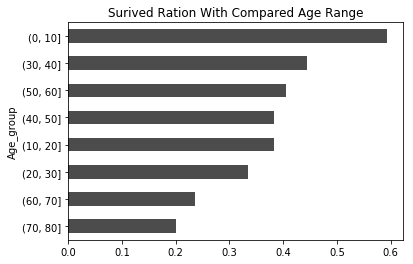

In [124]:
# cut the age data into groups
binsize = [0,10,20,30,40,50,60,70,80]
tt_file['Age_group'] = pd.cut(tt_file['Age'], bins=binsize)

# group data with age groups and surviving status
grouped_size = tt_file.groupby(['Age_group', 'Survived']).size()

#use mean() to calculate the survival ratio since 1-survived 0-non-survived
age_count_group = tt_file.groupby('Age_group')['Survived'].mean().sort_values(axis=0,\
                                               ascending=True)
print age_count_group

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across age groups and survival')

fig, axe = plt.subplots(1, 1)
age_count_group.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
           title='Surived Ration With Compared Age Range', )

### 2.2 Conclusions from the overview of survived people by age:

1) The 0-10 Age (Child) has the highest survived ratio.

2) The young people (20-40) are the biggest gruop among the survived and non-survived group. and 30-40 age range is the 2nd high survival ratio.

### 2.3 Consider the fare impact from the survived and non-survived people

Fare_group
(0, 20]       0.284000
(20, 40]      0.430000
(60, 80]      0.520833
(40, 60]      0.574074
(100, 120]    0.733333
(80, 100]     0.857143
(120, 140]    0.857143
Name: Survived, dtype: float64


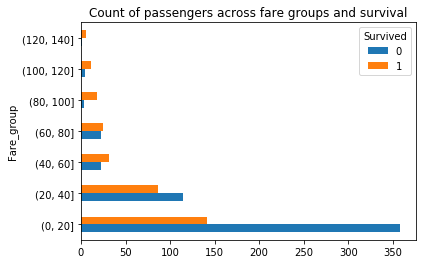

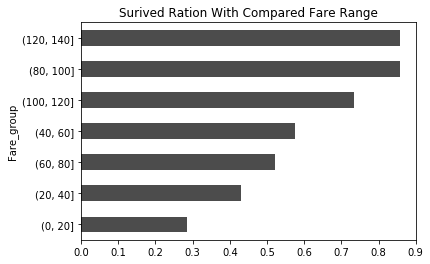

In [125]:
binsize = [0,20,40,60,80,100,120,140]
#cut the fare data into groups
#use mean() to calculate the survival ratio since 1-survived 0-non-survived
tt_file['Fare_group'] = pd.cut(tt_file['Fare'], bins=binsize)
fare_count_group = tt_file.groupby('Fare_group')['Survived'].mean().sort_values(axis=0,\
                                               ascending=True)
print fare_count_group

# group data with fare groups and surviving status
grouped_size = tt_file.groupby(['Fare_group', 'Survived']).size()

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across fare groups and survival')

fig, axe = plt.subplots(1, 1)
fare_count_group.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Fare Range', )

### 2.3 Conclusions from the overview of survived people by fare:

1) the 0-20 fare range is the most group people on the ship.

2) the highest survived rato among the fare range are above 60, which is 120-140, 80-100, and 100-120.

### 2.4 Consider the family-szie impact from the survived and non-survived people

Family_group
(6, 7]    0.000000
(4, 5]    0.136364
(3, 4]    0.200000
(5, 6]    0.333333
(0, 1]    0.552795
(1, 2]    0.578431
(2, 3]    0.724138
Name: Survived, dtype: float64


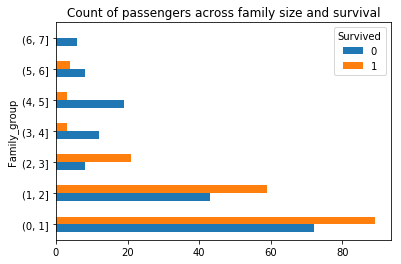

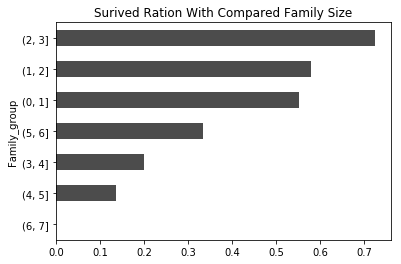

In [126]:

binsize = [0, 1, 2, 3, 4, 5, 6, 7]
tt_file['Family_group'] = pd.cut(tt_file['SibSp'] + tt_file['Parch'] , bins=binsize)


# group data with age groups and surviving status
grouped_size = tt_file.groupby(['Family_group', 'Survived']).size()
#use mean() to calculate the survival ratio since 1-survived 0-non-survived
family_count_group = tt_file.groupby('Family_group')['Survived'].mean().sort_values(axis=0,\
                                               ascending=True)
print family_count_group

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across family size and survival')

fig, axe = plt.subplots(1, 1)
family_count_group.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Family Size', )

### 2.4 Conclusions from the overview of survived people by family size:

1) the number of people with the family size less and equal 3 is the biggest group among both non-survived and survived people.

2) the singletons or small family size has more chance to survive.

### 2.5 Consider some field correlations from the survived and non-survived people

Survived    1.000000
Pclass      0.338481
Sex         0.543351
Age         0.071000
SibSp       0.035322
Parch       0.081629
Fare        0.257167
Embarked    0.169718
Name: Survived, dtype: float64


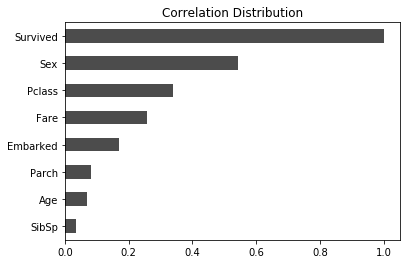

In [127]:
# convert the string type into integer type
field_digitization()

# use corr() to compute the correlation between the field 'Survived' and other fields
tt_series = tt_file.corr()['Survived'].abs()

# output the visualization result
fig, axe = plt.subplots(1, 1)
print tt_series
tt_series.sort_values(axis=0, ascending=True).plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Correlation Distribution', )

### 3 Some findings, prediction and limitation

1) the top3 highest correlations fields are 'Sex'', 'Pclass' and 'Fare'.

2) some predictions or conclustions

    -- Sex of female has more chance to survive according to 2.2. (and it might lie in the highest priorities for ladies and children in such disaster.
    
    -- Age of 0-10 and 30-40 range have more oppotunity to be saved according to 3.1
    
    -- singletons or small family size has more chance for survive according to 5.1 
    
3) some limitations

    -- some null field such as age, (nearly 1/8 or so) which might lead to incorrect results for such small dataset.
    
    -- the data set is just the sample data, not the population data. and the sample data size is 900+ which is not large enough to make prediction as above. in other words, it is only the correlation description， not the causal relationship.
    
    -- besides the variables in the data set reported, we need more data for further analyze, such as the weather situation( the wind, temperature, etc.), and what kind of the rescue carried out（ such as team size, the response time, etc), such kind of data could help us to improve the analyze/predict the survivals possibility in a disaster.
    
